# Regression Learning Strategies

**OBJECTIVES**:

Use both statsmodels and sklearn to build and refine regression models.  Specifically we will use OLS Models and Ridge Regressors to explore both libraries and understand how we can perform preprocessing and hyperparameter searches.

- OLS
 - F-test and significance of coefficients
 - Polynomial Features
 - Dummy Features
 - Pipelines
 
- Regularized Methods
 - Ridge
 - Lasso
 - StandardScaler
 - GridSearchCV
 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.api as sm

from sklearn.datasets import fetch_openml, fetch_california_housing
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
survey = fetch_openml(data_id=534, as_frame=True)

In [3]:
X = survey.data[survey.feature_names]
X.describe(include="all")

EDUCATION SOUTH   SEX  EXPERIENCE       UNION         AGE   RACE  \
count   534.000000   534   534  534.000000         534  534.000000    534   
unique         NaN     2     2         NaN           2         NaN      3   
top            NaN    no  male         NaN  not_member         NaN  White   
freq           NaN   378   289         NaN         438         NaN    440   
mean     13.018727   NaN   NaN   17.822097         NaN   36.833333    NaN   
std       2.615373   NaN   NaN   12.379710         NaN   11.726573    NaN   
min       2.000000   NaN   NaN    0.000000         NaN   18.000000    NaN   
25%      12.000000   NaN   NaN    8.000000         NaN   28.000000    NaN   
50%      12.000000   NaN   NaN   15.000000         NaN   35.000000    NaN   
75%      15.000000   NaN   NaN   26.000000         NaN   44.000000    NaN   
max      18.000000   NaN   NaN   55.000000         NaN   64.000000    NaN   

       OCCUPATION SECTOR     MARR  
count         534    534      534  
unique          6      3        2  
top         Other  Other  Married  
freq          156    411      350  
mean          NaN    NaN      NaN  
std           NaN    NaN      NaN  
min           NaN    NaN      NaN  
25%           NaN    NaN      NaN  
50%           NaN    NaN      NaN  
75%           NaN    NaN      NaN  
max           NaN    NaN      NaN

In [4]:
y = survey.target.values.ravel()
survey.target.head()

0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64

In [5]:
X.head(2)

EDUCATION SOUTH     SEX  EXPERIENCE       UNION   AGE      RACE OCCUPATION  \
0        8.0    no  female        21.0  not_member  35.0  Hispanic      Other   
1        9.0    no  female        42.0  not_member  57.0     White      Other   

          SECTOR     MARR  
0  Manufacturing  Married  
1  Manufacturing  Married

### Preparing the Data

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    float64 
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    float64 
 4   UNION       534 non-null    category
 5   AGE         534 non-null    float64 
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), float64(3)
memory usage: 17.1 KB


In [7]:
X['SOUTH'] = np.where(X['SOUTH'] == 'no', 0, 1)

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    float64 
 1   SOUTH       534 non-null    int64   
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    float64 
 4   UNION       534 non-null    category
 5   AGE         534 non-null    float64 
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(6), float64(3), int64(1)
memory usage: 20.6 KB


In [9]:
X['UNION'].value_counts()

not_member    438
member         96
Name: UNION, dtype: int64

In [10]:
X = pd.get_dummies(X, drop_first=True)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EDUCATION                534 non-null    float64
 1   SOUTH                    534 non-null    int64  
 2   EXPERIENCE               534 non-null    float64
 3   AGE                      534 non-null    float64
 4   SEX_male                 534 non-null    uint8  
 5   UNION_not_member         534 non-null    uint8  
 6   RACE_Other               534 non-null    uint8  
 7   RACE_White               534 non-null    uint8  
 8   OCCUPATION_Management    534 non-null    uint8  
 9   OCCUPATION_Other         534 non-null    uint8  
 10  OCCUPATION_Professional  534 non-null    uint8  
 11  OCCUPATION_Sales         534 non-null    uint8  
 12  OCCUPATION_Service       534 non-null    uint8  
 13  SECTOR_Manufacturing     534 non-null    uint8  
 14  SECTOR_Other             5

In [12]:
model = sm.OLS(y, X).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.830
Method:                 Least Squares   F-statistic:                              164.2
Date:                Fri, 02 Oct 2020   Prob (F-statistic):                   6.60e-191
Time:                        09:43:07   Log-Likelihood:                         -1525.8
No. Observations:                 534   AIC:                                      3084.
Df Residuals:                     518   BIC:                                      3152.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EDUCATION                   0.8611      0.387      2.228      0.026       0.102       1.620
SOUTH                      -0.5633      0.419     -1.343      0.180      -1.387       0.260
EXPERIENCE                  0.2939      0.324      0.907      0.365      -0.343       0.931
AGE                        -0.2072      0.316     -0.656      0.512      -0.828       0.413
SEX_male                    1.9431      0.419      4.639      0.000       1.120       2.766
UNION_not_member           -1.6039      0.510     -3.144      0.002      -2.606      -0.602
RACE_Other                 -0.2356      0.987     -0.239      0.811      -2.174       1.702
RACE_White                  0.6023      0.864      0.697      0.486      -1.096       2.300
OCCUPATION_Management       3.2680      0.762      4.289      0.000       1.771       4.765
OCCUPATION_Other           -0.0269      0.678     -0.040      0.968      -1.360       1.306
OCCUPATION_Professional     1.9328      0.669      2.890      0.004       0.619       3.247
OCCUPATION_Sales           -0.7968      0.837     -0.952      0.342      -2.441       0.847
OCCUPATION_Service         -0.7097      0.660     -1.075      0.283      -2.007       0.588
SECTOR_Manufacturing        0.5585      0.985      0.567      0.571      -1.376       2.493
SECTOR_Other               -0.4838      0.956     -0.506      0.613      -2.361       1.394
MARR_Unmarried             -0.3021      0.410     -0.738      0.461      -1.107       0.502
==============================================================================
Omnibus:                      244.106   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2321.413
Skew:                           1.757   Prob(JB):                         0.00
Kurtosis:                      12.591   Cond. No.                         335.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Building the Model

In [14]:
#make a train/test split -- evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)
#instantiate
lr = LinearRegression()
#fit on the train
lr.fit(X_train, y_train)
#score on train and test
print(f'The training data scored: {lr.score(X_train, y_train)}')
print(f'The test data scored: {lr.score(X_test, y_test)}')

The training data scored: 0.33370623324356696
The test data scored: 0.24613560246486088


In [16]:
f'This has a variable {np.mean(y_test)}'

'This has a variable 9.01126865671642'

In [17]:
unscaled_features = pd.DataFrame({'features': X.columns, 'coefs': lr.coef_})

In [18]:
#scale our data
sscaler = StandardScaler()

#fit only the training data
X_train_scaled = sscaler.fit_transform(X_train)
#transform the test data
X_test_scaled = sscaler.transform(X_test)

In [19]:
lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)
scaled_features = pd.DataFrame({'features': X.columns, 'coefs': lr2.coef_})

In [20]:
plt.style.use('seaborn-darkgrid')

<BarContainer object of 16 artists>

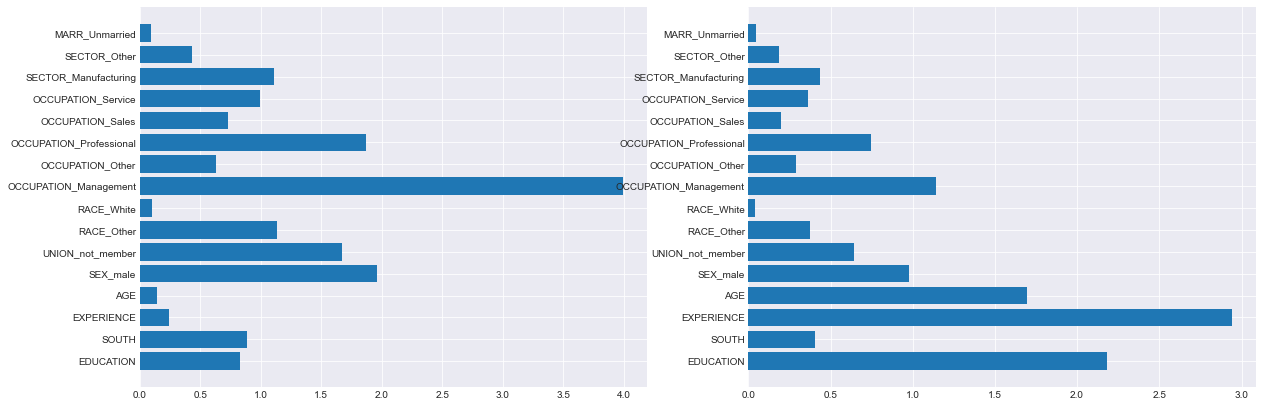

In [21]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
ax[0].barh(unscaled_features['features'], abs(unscaled_features['coefs']))
ax[1].barh(scaled_features['features'], abs(scaled_features['coefs']))
#scaled_features

In [22]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge.score(X_train_scaled, y_train)

0.3336514791431666

In [23]:
ridge.score(X_test_scaled, y_test)

0.24701803579424098

In [24]:
ridge_features = pd.DataFrame({'features': X.columns, 'coefs': ridge.coef_})

<BarContainer object of 16 artists>

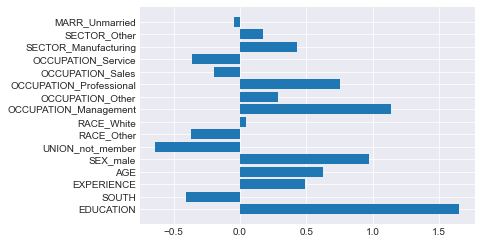

In [25]:
plt.barh(ridge_features.features, ridge_features.coefs)

In [26]:
sscaler = StandardScaler()
ridge = Ridge(alpha=100.0)
pipe = make_pipeline(sscaler, ridge)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.2873734441786736

In [27]:
pipe = make_pipeline(sscaler, ridge)

In [28]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=100.0))])

In [29]:
pipe.score(X_test, y_test)

0.2873734441786736

In [30]:
lr.score(X_test, y_test)

0.24613560246486088

### Polynomial Features

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly_features = PolynomialFeatures()

In [39]:
#X

In [34]:
poly_features.fit_transform(X)

array([[ 1.,  8.,  0., ...,  0.,  0.,  0.],
       [ 1.,  9.,  0., ...,  0.,  0.,  0.],
       [ 1., 12.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 1., 17.,  0., ...,  1.,  0.,  0.],
       [ 1., 12.,  1., ...,  1.,  0.,  0.],
       [ 1., 16.,  0., ...,  0.,  0.,  0.]])

In [35]:
x2 = np.array([[2, 3, 5],[1, 2, 3], [1, 1, 3]])

In [36]:
x2

array([[2, 3, 5],
       [1, 2, 3],
       [1, 1, 3]])

In [38]:
poly_features.fit_transform(x2)

array([[ 1.,  2.,  3.,  5.,  4.,  6., 10.,  9., 15., 25.],
       [ 1.,  1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,  3.,  9.]])

In [40]:
Xt = poly_features.fit_transform(X)

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(Xt, y)

LinearRegression()

In [44]:
lr.score(Xt, y)

0.45489663073201303

### Scale Data for Ridge

In [45]:
sscaler = StandardScaler()

In [49]:
ridge = Ridge()

In [50]:
X_train_scaled = sscaler.fit_transform(X_train)

In [51]:
X_test_scaled = sscaler.transform(X_test)

In [53]:
ridge.fit(X_train_scaled, y_train)

Ridge()

In [54]:
ridge.score(X_train_scaled, y_train)

0.3336514791431666

In [55]:
ridge.score(X_test_scaled, y_test)

0.24701803579424098

### Fit a Ridge

- Polynomial Features make it better -- how many?!
- What's the right alpha

In [56]:
poly_features = PolynomialFeatures()
sscaler = StandardScaler()
ridge = Ridge()

In [57]:
pipe = make_pipeline(poly_features, sscaler, ridge)

In [58]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [59]:
pipe.score(X_train, y_train)

0.49829820149888626

In [60]:
pipe.score(X_test, y_test)

-0.12132474331011611

### Determine Ideal Hyperparameter

In [61]:
params = {'polynomialfeatures__degree': [1, 2],
         'ridge__alpha': [0.01, 1.0, 10.0, 100.0, 1000.0]}

In [62]:
grid = GridSearchCV(pipe, param_grid=params)

In [63]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2],
                         'ridge__alpha': [0.01, 1.0, 10.0, 100.0, 1000.0]})

In [64]:
grid.best_params_

{'polynomialfeatures__degree': 1, 'ridge__alpha': 100.0}

In [65]:
grid.score(X_train, y_train)

0.32469828365764897

In [66]:
grid.score(X_test, y_test)

0.2873734441786736

In [67]:
!ls -a

.                    .ipynb_checkpoints   week_2.ipynb
..                   regression_big.ipynb
.git                 week1.ipynb
